In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [36]:
df = pd.read_csv('./data/wine.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [38]:
df.shape

(6497, 13)

In [39]:
df.values

array([[ 7.4 ,  0.7 ,  0.  , ...,  9.4 ,  5.  ,  1.  ],
       [ 7.8 ,  0.88,  0.  , ...,  9.8 ,  5.  ,  1.  ],
       [ 7.8 ,  0.76,  0.04, ...,  9.8 ,  5.  ,  1.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  9.4 ,  6.  ,  0.  ],
       [ 5.5 ,  0.29,  0.3 , ..., 12.8 ,  7.  ,  0.  ],
       [ 6.  ,  0.21,  0.38, ..., 11.8 ,  6.  ,  0.  ]])

In [40]:
# y = df.values[:,12]
# x = df.values[:,0:12]

# y=df.iloc[]

In [41]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# y_enc = enc.fit_transform(y)
# y_enc

In [42]:
y =df.iloc[:,12].values
x = df.iloc[:,:12].values

In [43]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [50]:
x.shape

(6497, 12)

# 모델돌리기

## binary

In [51]:
#모델 생성
model = Sequential()
model.add(Dense(36 ,input_dim=12, activation='relu'))  # input_dim x열 개수
model.add(Dense(18,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation = 'sigmoid')) # 마지막 노드 :1 , activation='sigmoid'
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                468       
                                                                 
 dense_13 (Dense)            (None, 18)                666       
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [53]:
x_train.shape
y_train.shape

(5197,)

In [54]:
# compile
model.compile(loss= 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [55]:
model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
260/260 [==============================] - 1s 4ms/step - loss: 0.3185 - accuracy: 0.8911
Epoch 2/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1945 - accuracy: 0.9319
Epoch 3/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9407
Epoch 4/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1564 - accuracy: 0.9463
Epoch 5/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1414 - accuracy: 0.9498
Epoch 6/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1337 - accuracy: 0.9552
Epoch 7/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9607
Epoch 8/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9613
Epoch 9/50
260/260 [==============================] - 1s 3ms/step - loss: 0.0999 - accuracy: 0.9696
Epoch 10/50
260/260 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9665

In [56]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9754


[0.07287593185901642, 0.9753845930099487]

## multi classification 

In [57]:
# 원핫으로 만들기
y_oh = tf.keras.utils.to_categorical(y)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_oh, test_size=0.2)

In [60]:
model = Sequential()
model.add(Dense(36 ,input_dim=12, activation='relu'))  # input_dim x열 개수
model.add(Dense(18,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(2,activation = 'softmax')) # 마지막 노드 :3 , activation='softmax'
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 36)                468       
                                                                 
 dense_21 (Dense)            (None, 18)                666       
                                                                 
 dense_22 (Dense)            (None, 9)                 171       
                                                                 
 dense_23 (Dense)            (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss = ['categorical_crossentropy'], metrics=['accuracy'], optimizer='adam')

In [63]:
x_train

array([[ 6.9 ,  0.41,  0.33, ...,  0.75, 11.1 ,  6.  ],
       [ 6.7 ,  0.16,  0.49, ...,  0.81, 10.4 ,  6.  ],
       [ 8.3 ,  0.42,  0.62, ...,  0.67,  9.7 ,  5.  ],
       ...,
       [ 6.1 ,  0.27,  0.43, ...,  0.47,  9.  ,  5.  ],
       [ 6.  ,  0.27,  0.26, ...,  0.43, 11.1 ,  6.  ],
       [ 6.7 ,  0.48,  0.08, ...,  0.64,  9.7 ,  5.  ]])

In [64]:
model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
260/260 [==============================] - 1s 4ms/step - loss: 0.3028 - accuracy: 0.8801
Epoch 2/50
260/260 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9296
Epoch 3/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1866 - accuracy: 0.9353
Epoch 4/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1794 - accuracy: 0.9375
Epoch 5/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9440
Epoch 6/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9452
Epoch 7/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1375 - accuracy: 0.9513
Epoch 8/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9530
Epoch 9/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9621
Epoch 10/50
260/260 [==============================] - 1s 3ms/step - loss: 0.1024 - accuracy: 0.9665

In [65]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9885


[0.04130246117711067, 0.9884615540504456]

In [66]:
model.save('./data/wine_model.h5')

# 저장하기

## model checkpointer

* 중간에 가장 좋았던 모델을 저장하기 위해

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y_oh, test_size=0.2)
model = Sequential()
model.add(Dense(36 ,input_dim=12, activation='relu'))  # input_dim x열 개수
model.add(Dense(18,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(2,activation = 'softmax')) # 마지막 노드 :3 , activation='softmax'
model.summary()
model.compile(loss = ['categorical_crossentropy'], metrics=['accuracy'], optimizer='adam')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 36)                468       
                                                                 
 dense_25 (Dense)            (None, 18)                666       
                                                                 
 dense_26 (Dense)            (None, 9)                 171       
                                                                 
 dense_27 (Dense)            (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [68]:
import os

In [69]:
model_dir = './data/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [71]:
modelpath = './data/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss',verbose=1, save_best_only=True)

# save_best_only 성능이 좋아질 경우에만 저장

In [72]:
history = model.fit(x_train, y_train, validation_split= 0.2, batch_size= 50, epochs=100, callbacks= [checkpointer])
# 한 에포크가 끝날때마다 

Epoch 1/100
84/84 [==============================] - ETA: 0s - loss: 5.5641 - accuracy: 0.5160
Epoch 1: val_loss improved from inf to 0.29755, saving model to ./data/model_check\01-0.297549.hdf5
84/84 [==============================] - 1s 6ms/step - loss: 5.5641 - accuracy: 0.5160 - val_loss: 0.2975 - val_accuracy: 0.8846
Epoch 2/100
78/84 [==========================>...] - ETA: 0s - loss: 0.2308 - accuracy: 0.9197
Epoch 2: val_loss improved from 0.29755 to 0.18730, saving model to ./data/model_check\02-0.187303.hdf5
84/84 [==============================] - 0s 5ms/step - loss: 0.2314 - accuracy: 0.9197 - val_loss: 0.1873 - val_accuracy: 0.9365
Epoch 3/100
76/84 [==========================>...] - ETA: 0s - loss: 0.2056 - accuracy: 0.9313
Epoch 3: val_loss improved from 0.18730 to 0.18683, saving model to ./data/model_check\03-0.186826.hdf5
84/84 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.9317 - val_loss: 0.1868 - val_accuracy: 0.9356
Epoch 4/100
76/84 [=

Epoch 27/100
71/84 [========================>.....] - ETA: 0s - loss: 0.0777 - accuracy: 0.9763
Epoch 27: val_loss improved from 0.07909 to 0.07594, saving model to ./data/model_check\27-0.075940.hdf5
84/84 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9750 - val_loss: 0.0759 - val_accuracy: 0.9788
Epoch 28/100
71/84 [========================>.....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9758
Epoch 28: val_loss improved from 0.07594 to 0.07322, saving model to ./data/model_check\28-0.073222.hdf5
84/84 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9757 - val_loss: 0.0732 - val_accuracy: 0.9788
Epoch 29/100
78/84 [==========================>...] - ETA: 0s - loss: 0.0782 - accuracy: 0.9728
Epoch 29: val_loss did not improve from 0.07322
84/84 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9731 - val_loss: 0.0852 - val_accuracy: 0.9779
Epoch 30/100
70/84 [========================>.....] - ETA: 0s - los

Epoch 55/100
81/84 [===========================>..] - ETA: 0s - loss: 0.0598 - accuracy: 0.9802
Epoch 55: val_loss did not improve from 0.05465
84/84 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9798 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 56/100
80/84 [===========================>..] - ETA: 0s - loss: 0.0568 - accuracy: 0.9833
Epoch 56: val_loss improved from 0.05465 to 0.05453, saving model to ./data/model_check\56-0.054526.hdf5
84/84 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9839 - val_loss: 0.0545 - val_accuracy: 0.9846
Epoch 57/100
75/84 [=========================>....] - ETA: 0s - loss: 0.0570 - accuracy: 0.9813
Epoch 57: val_loss did not improve from 0.05453
84/84 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.0575 - val_accuracy: 0.9846
Epoch 58/100
71/84 [========================>.....] - ETA: 0s - loss: 0.0505 - accuracy: 0.9842
Epoch 58: val_loss did not i

Epoch 84/100
81/84 [===========================>..] - ETA: 0s - loss: 0.0530 - accuracy: 0.9805
Epoch 84: val_loss improved from 0.04813 to 0.04676, saving model to ./data/model_check\84-0.046764.hdf5
84/84 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9808 - val_loss: 0.0468 - val_accuracy: 0.9894
Epoch 85/100
79/84 [===========================>..] - ETA: 0s - loss: 0.0650 - accuracy: 0.9780
Epoch 85: val_loss did not improve from 0.04676
84/84 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9779 - val_loss: 0.0544 - val_accuracy: 0.9846
Epoch 86/100
79/84 [===========================>..] - ETA: 0s - loss: 0.0622 - accuracy: 0.9797
Epoch 86: val_loss did not improve from 0.04676
84/84 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9793 - val_loss: 0.0492 - val_accuracy: 0.9885
Epoch 87/100
80/84 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9840
Epoch 87: val_loss improved 

In [73]:
history.history

{'loss': [5.564115524291992,
  0.23140081763267517,
  0.20453116297721863,
  0.20179399847984314,
  0.20051699876785278,
  0.19770249724388123,
  0.19768109917640686,
  0.19527791440486908,
  0.19305600225925446,
  0.19375914335250854,
  0.1861114799976349,
  0.18160246312618256,
  0.16772343218326569,
  0.15400047600269318,
  0.1374875158071518,
  0.12720340490341187,
  0.13185624778270721,
  0.11630086600780487,
  0.10813713073730469,
  0.11372558027505875,
  0.10234512388706207,
  0.09692849218845367,
  0.09923221915960312,
  0.08762723207473755,
  0.08565179258584976,
  0.08603063225746155,
  0.08005048334598541,
  0.07782482355833054,
  0.07724923640489578,
  0.0789167508482933,
  0.09162230044603348,
  0.07182350009679794,
  0.07673182338476181,
  0.06850089877843857,
  0.0682917982339859,
  0.0688658207654953,
  0.07953288406133652,
  0.06617726385593414,
  0.06663692742586136,
  0.06339521706104279,
  0.06802722066640854,
  0.0653359517455101,
  0.06698566675186157,
  0.0652258

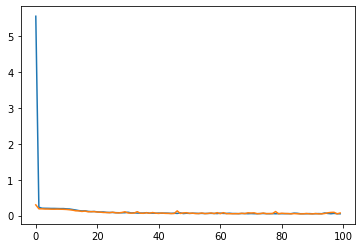

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

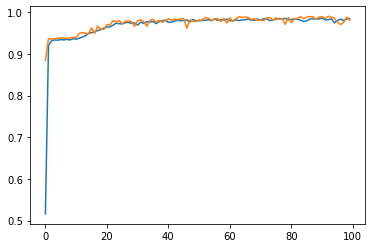

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## early stopping

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
early_stopping_callback = EarlyStopping(monitor ='val_loss', patience =10)

In [79]:
# callbacks 변수에 early_stopping 추가
history = model.fit(x_train, y_train, validation_split=0.2 , batch_size=50, epochs=100,\
                   callbacks= [checkpointer,early_stopping_callback])

Epoch 1/100
71/84 [========================>.....] - ETA: 0s - loss: 0.0447 - accuracy: 0.9856
Epoch 1: val_loss did not improve from 0.04489
84/84 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.0460 - val_accuracy: 0.9885
Epoch 2/100
80/84 [===========================>..] - ETA: 0s - loss: 0.0455 - accuracy: 0.9875
Epoch 2: val_loss did not improve from 0.04489
84/84 [==============================] - 0s 5ms/step - loss: 0.0451 - accuracy: 0.9875 - val_loss: 0.0456 - val_accuracy: 0.9894
Epoch 3/100
82/84 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9817
Epoch 3: val_loss did not improve from 0.04489
84/84 [==============================] - 0s 5ms/step - loss: 0.0491 - accuracy: 0.9820 - val_loss: 0.0457 - val_accuracy: 0.9894
Epoch 4/100
73/84 [=========================>....] - ETA: 0s - loss: 0.0436 - accuracy: 0.9866
Epoch 4: val_loss did not improve from 0.04489
84/84 [==============================] - 0s 5

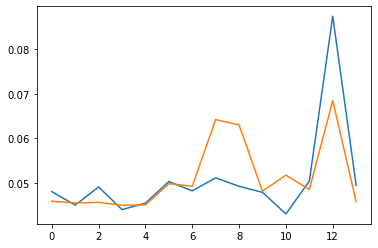

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

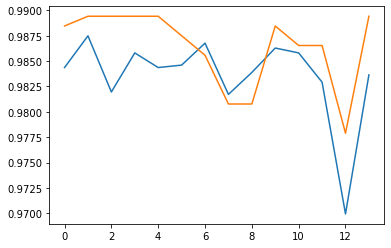

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])